<a href="https://colab.research.google.com/github/priti2500/Hotel_Booking_EDA/blob/main/Hotel_Booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking

### **Project Type**    - EDA

# **Project Summary -**

####**I undertook this project with the objective of understanding the business performance of a Hotel Group. The dataset includes information from two types of hotels: City Hotel and Resort Hotel. The data spans over three years — 2015, 2016, and 2017 — and contains details such as revenue, booking records, number of stay days, booking cancellations, and total number of guests including children. It also captures information like guest waiting time, repeat visitors, food preferences, and more. Additionally, the dataset provides insights into the countries from which bookings were made, as well as the agents and distribution channels that contributed to bookings for both hotel types.**

####T**he data is categorized by hotel type, allowing for a meaningful comparison between City Hotel and Resort Hotel.**

####**Before visualizing any data, I performed data cleaning — including filling in missing values and removing duplicates. This was followed by data wrangling to prepare the dataset for analysis.**

####**I carried out separate analyses for City Hotel and Resort Hotel, as well as comparative analysis between the two. Various charts and visualizations were used to gain clearer insights into the data.**

# **GitHub Link -**

https://github.com/priti2500/Hotel_Booking_EDA/tree/main

# **Problem Statement**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made,the number of adults, children, and/or babies, and the number of available parking spaces, which agent made the booking, among other things.**
##### **The objective of this project is Explore and analyze the data to discover important factors that govern the bookings.**

### **Define Your Business Objective?**

**Analyse and visualize the data on bookings of City Hotel and Resort Hotel to gain insights on the different factors that affect the booking and ADR.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

### Dataset Loading

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading Dataset
file_path='/content/drive/MyDrive/Hotel Bookings.csv'
#asigned simple name to dataset as df
df = pd.read_csv(file_path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.index

RangeIndex(start=0, stop=119390, step=1)

In [6]:
#To check the columns in data set
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_values = df.duplicated().value_counts()
duplicate_values

,count
False,87396
True,31994


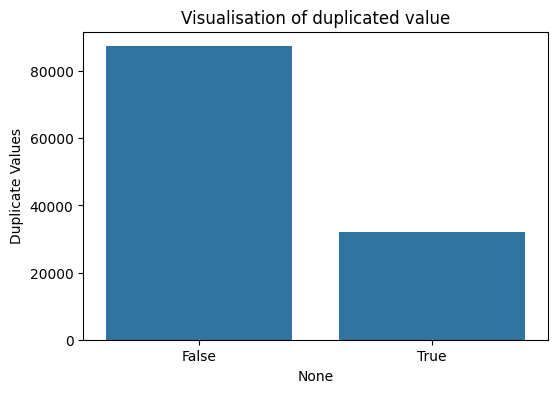

In [9]:
# Visualizing the duplicate values
plt.figure(figsize=(6,4))
#assigning the fig size to this countplot

sns.countplot(x=df.duplicated())
plt.title('Visualisation of duplicated value')
plt.ylabel('Duplicate Values')
plt.show()

In [10]:
# Dataset Duplicate Value Drop
df.drop_duplicates(inplace=True)

In [11]:
unique_df=df.shape[0]
unique_df
# as we can see that before dropping duplicate values we are having 119390 rows
# and now after droping duplicate rows we can see that there are 87396 uniqe rows

87396

In [12]:
#lets reset the index to view the unique data
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
null_values = df.isna()== True
null_values
#we have check the null values in DataFrame

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [14]:
df.fillna(np.nan , inplace=True)
df
#We have replaced all null values as NaN

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


In [15]:
# Visualizing the missing values
a = df.isna().sum()
missing_values=a.sort_values(ascending = False)[:5]
missing_values

,0
company,82137
agent,12193
country,452
children,4
arrival_date_month,0


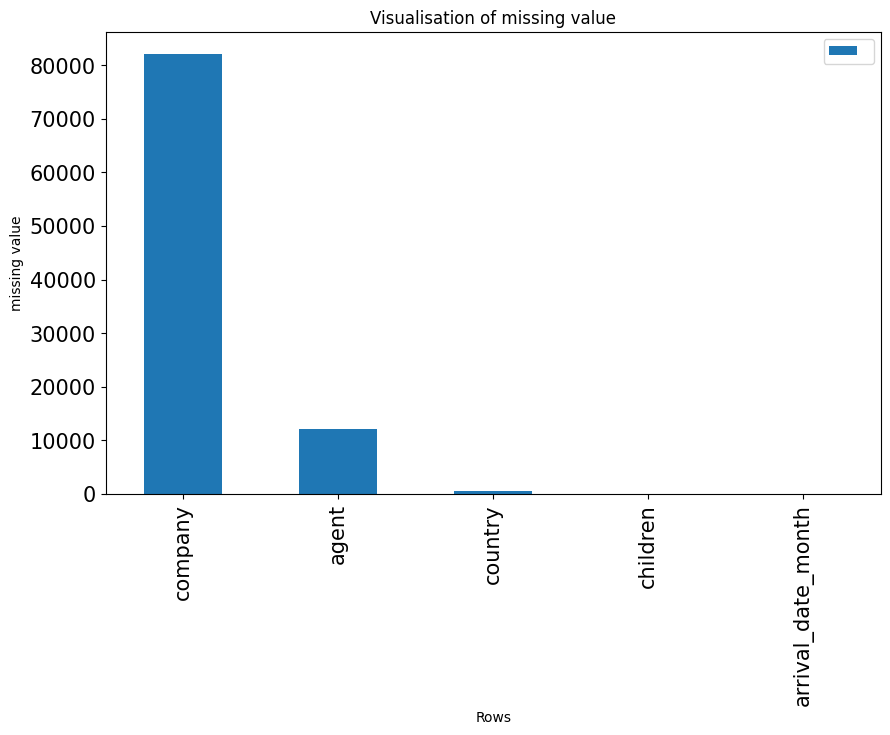

In [16]:
plt.figure(figsize=(10,6))
missing_values.plot(kind = 'bar', fontsize = 15,legend='True')
plt.title('Visualisation of missing value')
plt.ylabel('missing value')
plt.xlabel('Rows')
plt.show()

### What did you know about your dataset?

##### **1. The given dataset is of Hotel Booking and I have to analyse and explore this dataset to discover important factors which affects the Hotel Booking. This dataset has 119390 rows and 32 coulumns.**
##### **2. The duplicate value count is 31994 rows.**
##### **3. There are 4 columns in dataset which is having missing valuse and those columns are company, agent, country and children.**
##### **4. There are separate columns called adults, children and babies that show the total number of people who are coming to visit, so instead of different columns will add these three in one called total_num_people**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [19]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,14-02-2016
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Variables Description

*   hotel - **Type of hotel(Resort or City).**
*  is_canceld - **If there was booking cancel(0) or not(1).**
* lead time - **The number of days between time books their room to arrive hotel.**
* arrival_date_year - **Year of arrival date.**
* arrival_date_month - **Month of arrival date.**
* arrival_date_week_number - **Week no. of year for arrival date.**
* stays_in_weekend_nights - **No. of weekend nights(Saturday or sunday) spend
 by guest at hotel.**
* stays_in_week_nights -**No. of weeknight( Mon to Fri) spend by guest at hotel.**
* adults - **No. of adults among guest.**
* children - **No. of children among guest.**
* babies - **No. of babies among guest.**
* meal - **Type of meal booked by guest.**
* country - **Country of guest.**
* market_segment -  **grouping into categories based on their booking patterns and travel habits.**
* distribution_channel - **Name of booking distribution channel.**
* is_repeated_guest - **If the booking was from repeated by guest(1) or not(0).**
* previous_cancelletions - **No. of previous booking that were cancelled by the customer prior to the customer booking.**
* previous_booking_not_canceled - **No. of previous booking that were not cancelled by the customer prior to the customer booking.**
* reserved_room_type - **Code of room type reserved.**
* assigned_room_type - **code of room type reserved.**
* booking_changes - **No. of changes made to the booking.**
* deposit_type - **Type of the deposit made by the guest.**
* agent - **Id of the agent who made the booking.**
* company - **Id of the company that made the booking.**
* days_in_waiting_list - **No. of days the booking on the waiting list.**
* customer_type - **Type of customer, assuming one of four categories**.
* adr - **(Average Daily Rate) dividing the sum of lodgging transaction by the total number of staying night.**
* required_car_parking_spaces - **No. of car parking spaces required by the customer.**
* total_of_special_request - **No. of special request made by the customer.**
* reservation_request - **Reservation status**
* reservation_request_date - **Date of last reservation status updated.**

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
# We describe all the unique values using lambda fuction of indivisual column.
a=df.apply(lambda col: col.unique())
print(a)

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## ***3. Data Wrangling***

### Already did some data cleaning before lets go for data Wrangling

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
#making a copy of data set
df1= df.copy()

In [22]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as a column
df1['total_num_people'] = df1['adults']+df1['children']+df1['babies']

df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_num_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,2,2.0


In [23]:
#There are some rows with total number of
#adults,children or babies equal to zero this means there is no any booking were made.
# So we can remove such rows

df1[df1['total_num_people']== 0].shape

(166, 34)

In [24]:
df1.drop(df1[df1['total_num_people']== 0].index ,inplace=True)
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_num_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,2,2.0


### What all manipulations have you done and insights you found?



**1.Three columns 'adults','children','babies' had valuen zero which means no booking has done here, so these columns were removed**

**2.In dataset, there were 31994 duplicate values. So those values were removed.**

**3.There were 4 columns which have missing values and the columns were 'company','agent','country','children'. The values from these columns are replaced by NaN.**

**4.In dataframe added two columns tatal_stay and total_num_people.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1
####*Question no. 1 Which Type Of hotel have More number of bookings [ City hotels or Resort Hotels ]*

In [25]:
# Chart - 1 visualization code
hotel_value_counts = df1['hotel'].value_counts()
hotel_value_counts

,count
hotel,
City Hotel,53274
Resort Hotel,33956


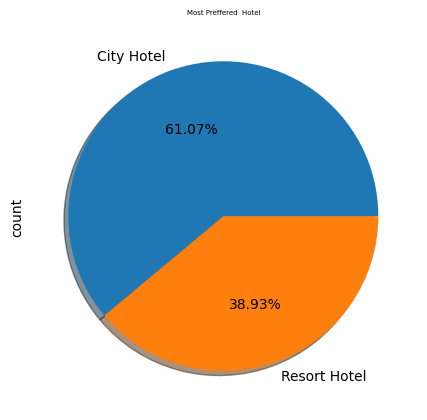

In [26]:
#Pie Chart for Most Preffered  Hotel
hotel_value_counts.plot.pie(figsize=(5,7),shadow=True,fontsize=10, autopct='%1.2f%%',)

plt.title('Most Preffered  Hotel',fontsize = 5)
plt.show()

#### 1. Why did you pick the specific chart?
##### **I used the pie chart To check and understand the hotel type is resort or city in simple way of visualizing.**

####2. What is/are the insight(s) found from the chart?
##### **Based on the above observations, I found that 61.07% preferred city hotel and 38.93% preferred to book a resort hotel.**
##### **Which means Resort hotels have less booking**

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.
#####**City hotel can find more services to attract more guests to increase more revenue.**
##### **Resort Hotel can find a solution to attract customers and also find the facilities provided by the city Hotel to attract customers.***
##### **So Yes, gained insights help creating a positive business impact.**

### Chart - 2
####*Question no. 2 Which year had highest bookings[ City hotels or Resort Hotels ]*

Text(0.5, 1.0, 'Yearly Bookings')

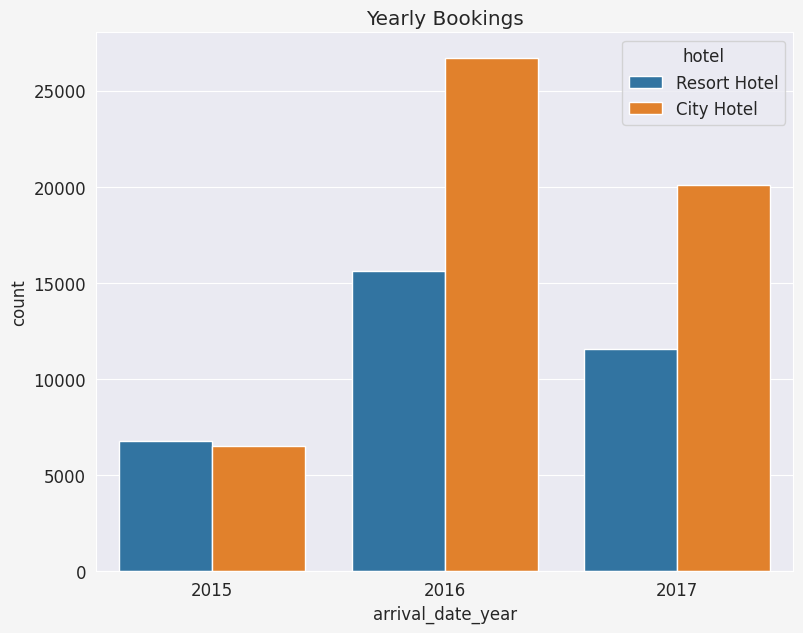

In [27]:
# Chart - 2 visualization code(highest bookings)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 7)
matplotlib.rcParams['figure.facecolor'] = '#F5F5F5'
sns.countplot (x= 'arrival_date_year', data= df1, hue= 'hotel').set_title ('Yearly Bookings')

##### 1. Why did you pick the specific chart?

**I selected this histogram so as to identify bookings done year wise by city hotel and Resort hotel**

##### 2. What is/are the insight(s) found from the chart?

**The histogram shows that the city hotel has made more number of bookings than resort in years 2016 and 2017.**
**The resort did have more bookings in 2016 but there was a noticeable decline in 2017.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, The resort is making lesser bookings than hotel hence they will need more insights on how should the increase bookings.**
**For 2016 both city and resort have highest number of bookings.**
**Booking subsequently declined in 2017. Both managements of city and Resort have to identify why was there a decline.**


### Chart - 3
####*Question no. 3 Which Type Of hotel have Highest revenue or ADR[ City hotels or Resort Hotels ]*

Text(0.5, 1.0, 'Avg ADR of each Hotel type')

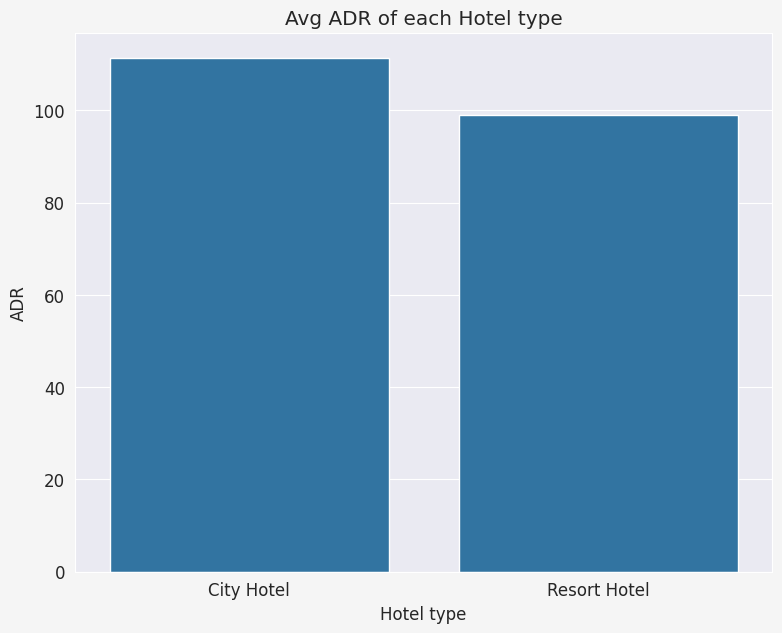

In [28]:
# Chart - 3 visualization code (Highest revenue)
# group by hotel
grup_by_hotel=df1.groupby('hotel')

#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(9,7))

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

##### 1. Why did you pick the specific chart?
 **I choose bar plot because it gives simple pictorial diagram and it also easy to understand for Avg ADR Of each hotel Type.**

##### 2. What is/are the insight(s) found from the chart?
**from above insights i found that city hotels have more ADR that means City hotels Generate more Revenue than Resort Hotels**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
**City hotel has **ADR** 110 means more revenue and resort hotel has almost 99 **ADR** means less revenue than city hotel.**
**City hotel has high adr this makes positive impact.**

**Resort hotel has less adr as compared to city hotel this makes negative impact.**
**Resort hotel should have increase there facilities which increase revenue.**

### Chart - 4
####*Question no. 4 What is the percentage distribution of required car parking space*

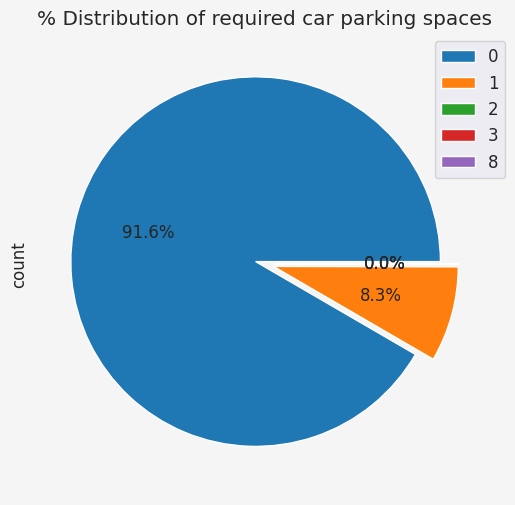

In [29]:
# Chart - 4 visualization code (required car parking space)


df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(8,6),fontsize=12,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

##### 1. Why did you pick the specific chart?

**I choose pie chart because it gives simple visualization of data.**

##### 2. What is/are the insight(s) found from the chart?

**91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.**

##### 3. Will the gained insights help creating a positive business impact?
**Are there any insights that lead to negative growth? Justify with specific reason.**

##### **Most of the guest do  not required Parking space, No need to invest more on parking space.**

### Chart - 5
####*Question no. 5 Which hotel has most waiting list of guests*

In [30]:
# Chart - 5 visualization code (most waiting list of guests)

waiting_list = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
waiting_list

,hotel,days_in_waiting_list
0,City Hotel,1.020066
1,Resort Hotel,0.316763


Text(0.5, 0, 'Type of hotel')

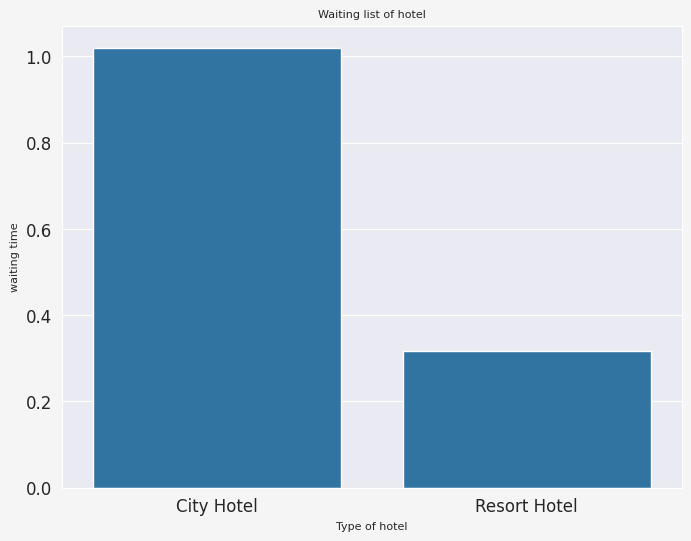

In [31]:
# Here we see the visual representation of waiting list of guests
plt.figure(figsize=(8,6))
sns.barplot(x=waiting_list['hotel'],y=waiting_list['days_in_waiting_list'])
plt.title("Waiting list of hotel",fontsize=8)
plt.ylabel('waiting time',fontsize=8)
plt.xlabel('Type of hotel',fontsize=8)

##### 1. Why did you pick the specific chart?

**This chart gives us a fair idea of the time Guests waited for their booking to be confirmed.**

##### 2. What is/are the insight(s) found from the chart?

**We can see City hotel bookings had a higher waiting time.**

##### 3. Will the gained insights help creating a positive business impact?
**Are there any insights that lead to negative growth? Justify with specific reason.**


##### **City Hotels should look for alternatives to reduce the waiting period.**
##### **The mean of days in waiting list for city hotel is about 1.02 and for resort hotel is about 0.32.**
##### **Resort hotel need to increase their facilities so that their bookings increases**.

### Chart - 6
####*Question no. 6 What is the pecentage of Booking cancellation for both type*

Text(0.5, 1.0, 'Cancellation')

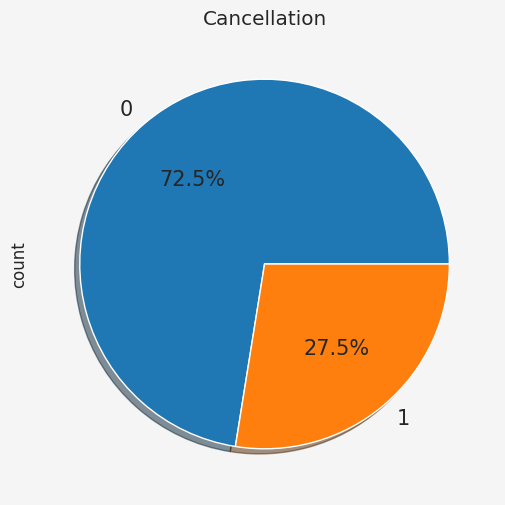

In [32]:
# Chart - 6 visualization code ( Booking cancellation for both type)
df1['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,6),fontsize=15)
plt.title("Cancellation")

##### 1. Why did you pick the specific chart?
**I choose pie chart because it gives simple visualization of data.**

##### 2. What is/are the insight(s) found from the chart?
**Here, we found that overall more than 27% of booking got cancelled,
0 = not cancelled
1 = cancelled**

##### 3. Will the gained insights help creating a positive business impact?
**Are there any insights that lead to negative growth? Justify with specific reason.**
##### **Here we can see that overall 27% of the bookings were cancelled, from a business perspective it falls under negative impact.**
##### **To overcome this, we need to find the reasons behind it and take appropriate action.**  

### Chart - 7
####*Question no. 7 -In which months there are more number of bookings*

In [33]:
# Chart - 7 visualization code
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

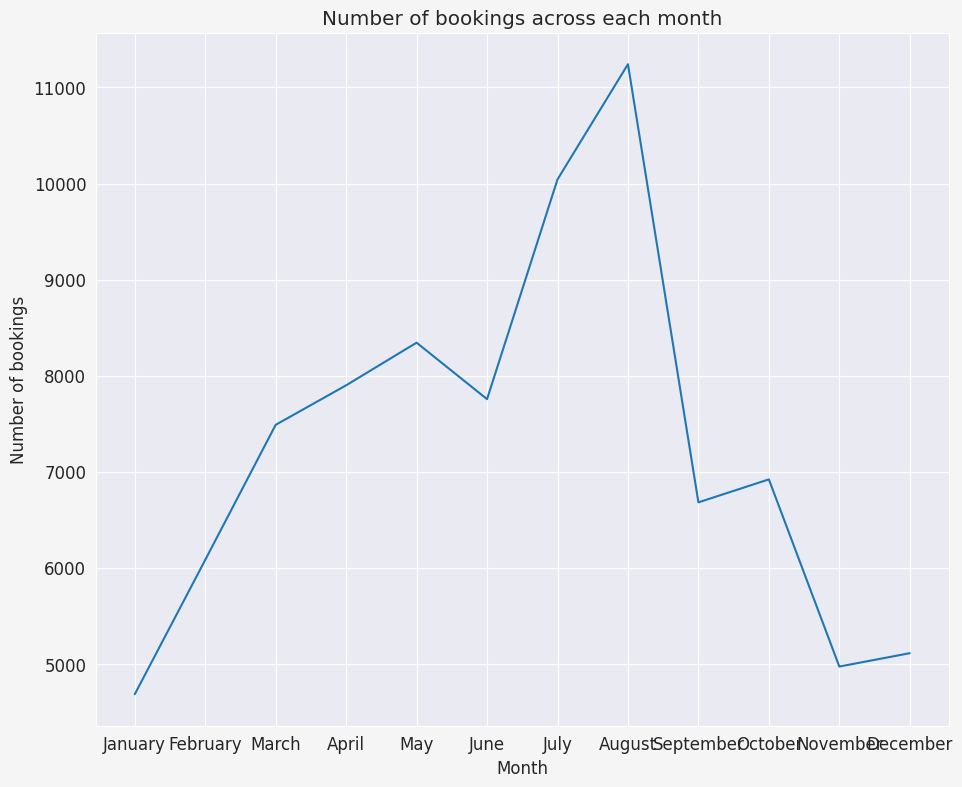

In [34]:
# set plot size
plt.figure(figsize=(11,9))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

<Axes: ylabel='count'>

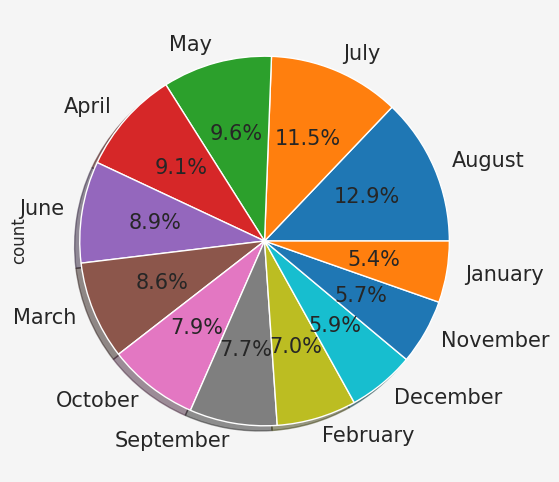

In [35]:
df1['arrival_date_month'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,6),fontsize=15)

##### 1. Why did you pick the specific chart?
##### **To show the percentage share of booking in each month on overall level, in easy way**

##### 2. What is/are the insight(s) found from the chart?
##### **July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
##### **Yes, with increased volume of visitors will help hotel to manage revenue in this three months, will also help employee satisfaction and retention.**
**It will lead to positive business impact**

### Chart - 8
####*Question no. 8 From which medium the most no. of booking is done?*

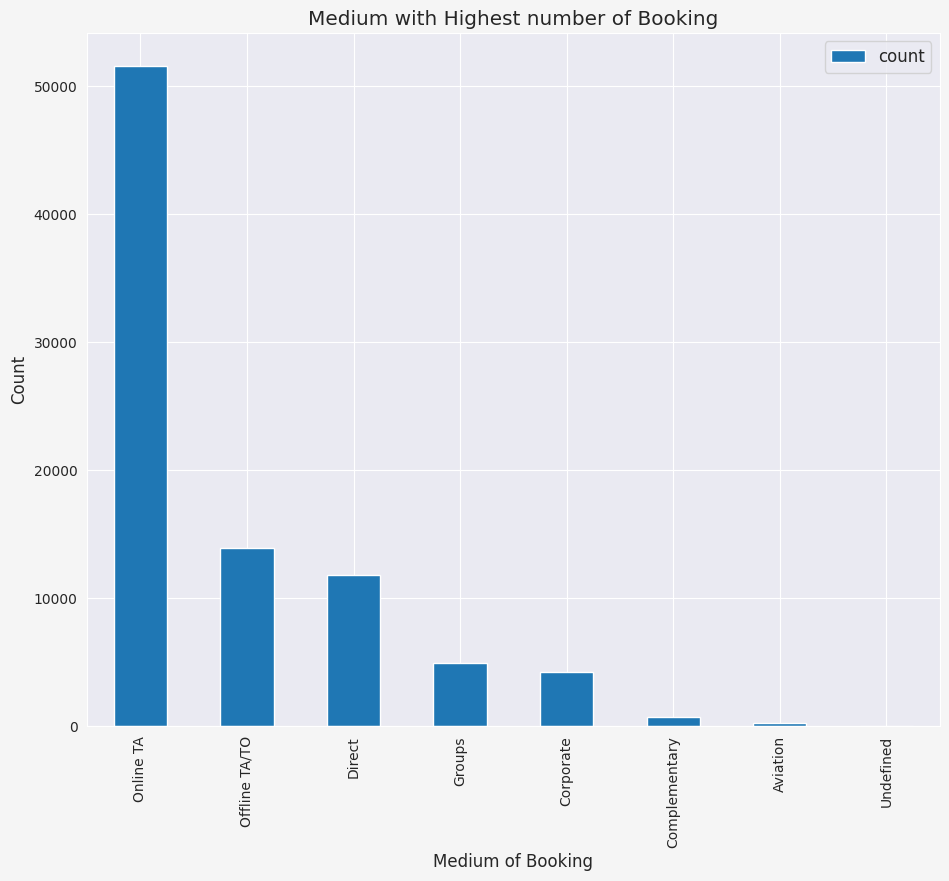

In [36]:
# Chart - 8  visualization code(medium the most no. of booking is done?)
agents = df1['market_segment'].value_counts()
plt.figure(figsize=(11,9))
agents.plot(kind = 'bar', fontsize = 10,legend='True')
plt.title('Medium with Highest number of Booking')
plt.ylabel('Count')
plt.xlabel('Medium of Booking')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar graph gives an easy understanding of all the bookings done through the medium.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the maximum bookings is done through Online TA and Offline TA/TO.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The Business will benefit by understanding that their Direct bookings are very less compared to Agents booking hence they can do a brainstorming session on how can they increase the direct booking so as to not pay agent commission if paid any**

### Chart - 9
####*Question no. 9 Which is the most prefered room type by guest*

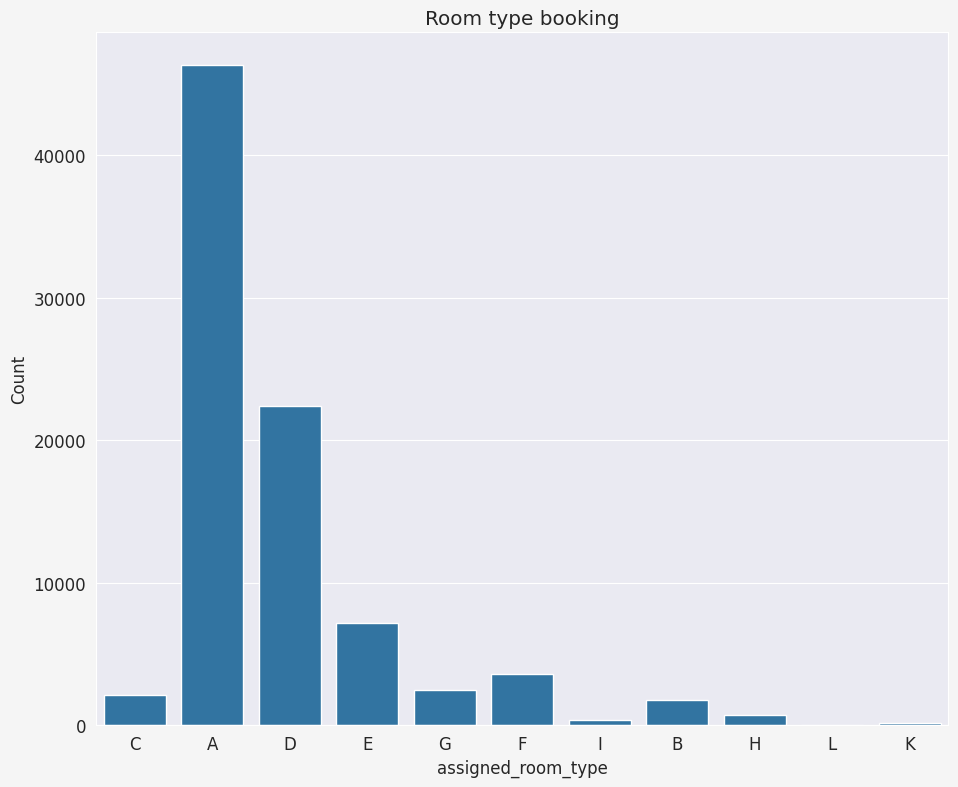

In [37]:
# Chart - 9 Assignment of Room Type
plt.figure(figsize=(11,9))
sns.countplot(x=df1['assigned_room_type'])
plt.title('Room type booking')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**This chart helps us to understand type of rooms which are booked .**

##### 2. What is/are the insight(s) found from the chart?

**Room type A and D have been booked maximum in the last 3years.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### **The management will be able to understand that the maximum bookings are done for type A and D hence they can either reduce type of rooms or get more amenities in other types.**
##### **They can also look at providing discounts.**

### Chart - 10
####*Question no. 10 What is the repeated percentage for customers?[ for both type of hotel ie. City hotels or Resort Hotels ]*

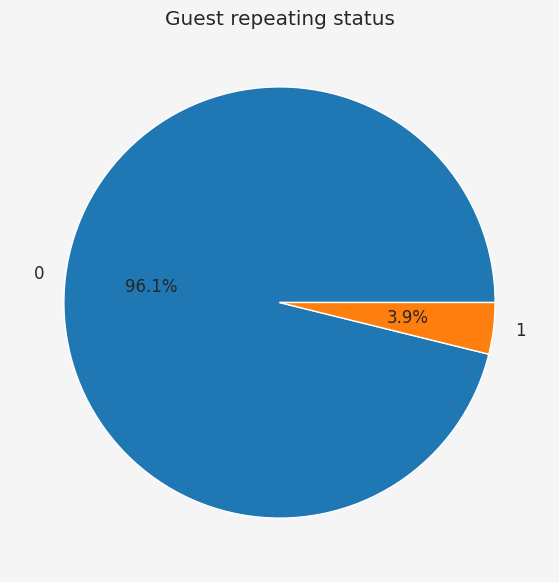

In [38]:
# Chart - 10 Repeated customers
is_repeated_guest = df1['is_repeated_guest']
counts = is_repeated_guest.value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Guest repeating status')
plt.show()

##### 1. Why did you pick the specific chart?

**The pie chart helps us understand the distribution of guests that have come again to the Hotel.**

##### 2. What is/are the insight(s) found from the chart?

**We have a very small percentage of clients repeating the hotel and though we have a large clientile.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**yes the business will analyse as to how should we attract exsisting client base and how can we make them feel special so that they come back either for business or pleasure.**

### Chart - 11
####*Question no. 11 What is optimal stay length in both types of hotel ie. City hotels and Resort Hotels*

In [39]:
# Chart - 11 visualization code(optimal stay length)
stay_length =df1.groupby(['hotel','total_stay']).agg('count').reset_index()
stay_length = stay_length.iloc[:, :3]
stay_length = stay_length.rename(columns={'is_canceled':'Number of stays'})
stay_length

,hotel,total_stay,Number of stays
0,City Hotel,0,231
1,City Hotel,1,10270
2,City Hotel,2,10813
3,City Hotel,3,13542
4,City Hotel,4,9610
...,...,...,...
68,Resort Hotel,45,1
69,Resort Hotel,46,1
70,Resort Hotel,56,2
71,Resort Hotel,60,1


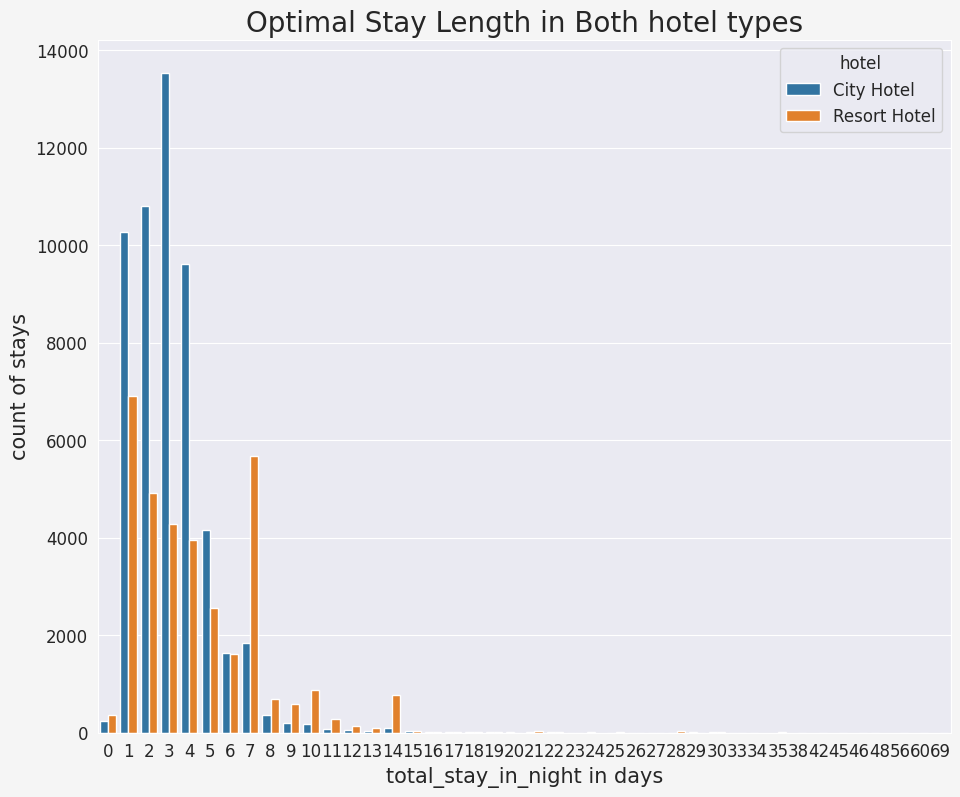

In [40]:
plt.figure(figsize=(11,9))
sns.barplot(x='total_stay',y='Number of stays', data=stay_length,hue='hotel')
plt.title('Optimal Stay Length in Both hotel types', fontsize=20)
plt.xlabel('total_stay_in_night in days',fontsize=15)
plt.ylabel('count of stays', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

**In order to understand which type of hotel has Optimal stay length, this chart seemed perfect for that.**

##### 2. What is/are the insight(s) found from the chart?

**From above insight we have found that the avrage stay length is 7 days for both types**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**As the data given we can see that the longer the coustomer stays the maximum revenue is maid by the Hotel.**
**so to increase the rate of ADR and revenue we should find ways to retaine coustomers for longer days.**   
**For overall business growth managment can look at ways to retain customers for longer days.**

### Chart - 12
####*Question no. 12 Which is most prefered food type?*

In [41]:
# Chart - 12 visualization code(food type)
most_prefered_food = df1['meal'].value_counts()
most_prefered_food

,count
meal,
BB,67907
SC,9391
HB,9080
Undefined,492
FB,360


Text(0.5, 0, 'Type of the food')

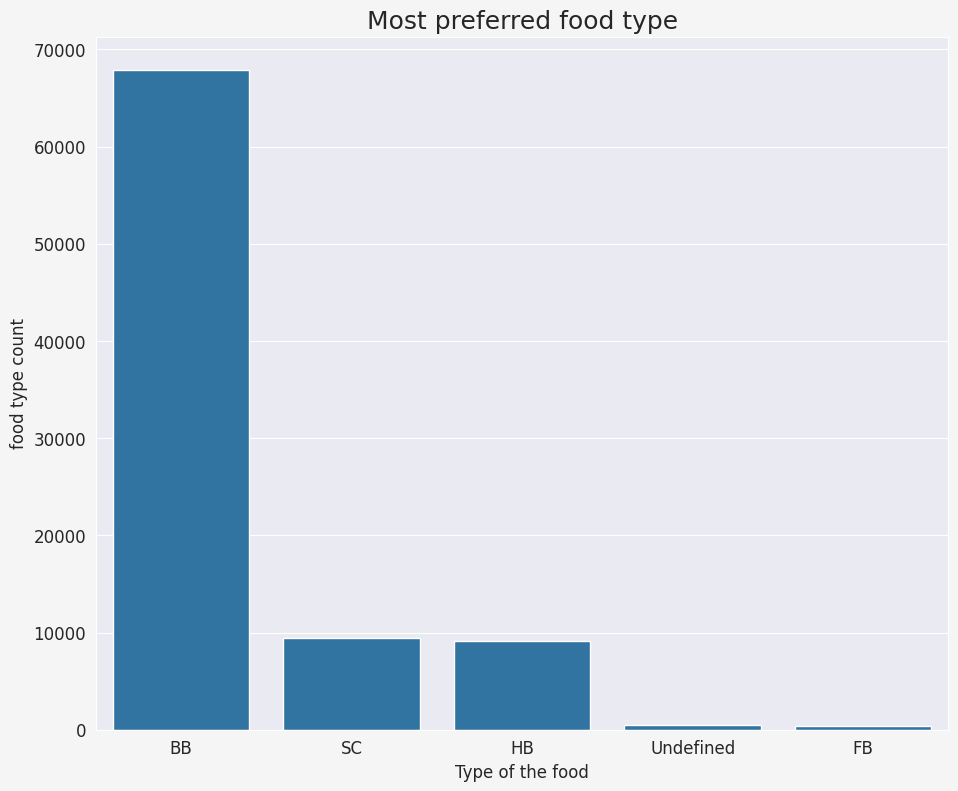

In [42]:
#visualization of most preferred food by guest
plt.figure(figsize=(11,9))
sns.countplot(x=df1['meal'],order=df1['meal'].value_counts().index)
plt.title("Most preferred food type",fontsize=18)
plt.ylabel('food type count',fontsize=12)
plt.xlabel('Type of the food',fontsize=12)

##### 1. Why did you pick the specific chart?

**This chart actually helps us in understanding what is the most preferred food option for guests.**

##### 2. What is/are the insight(s) found from the chart?

**Bed and Breakfast(BB)is the most preferred type of booking for Guest.**

##### 3. Will the gained insights help creating a positive business impact?
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Management can look at providing more lucrative options to Guests so that othe Food choices are also preferred. BB option can also be made on a limited basis so that incoming guests can look at other options as well.**

### Chart - 13
####*Relationship between  adr and total stay*
####*ADR relationship with total number of people*

Text(0.5, 1.0, 'Relationship between  adr and total stay')

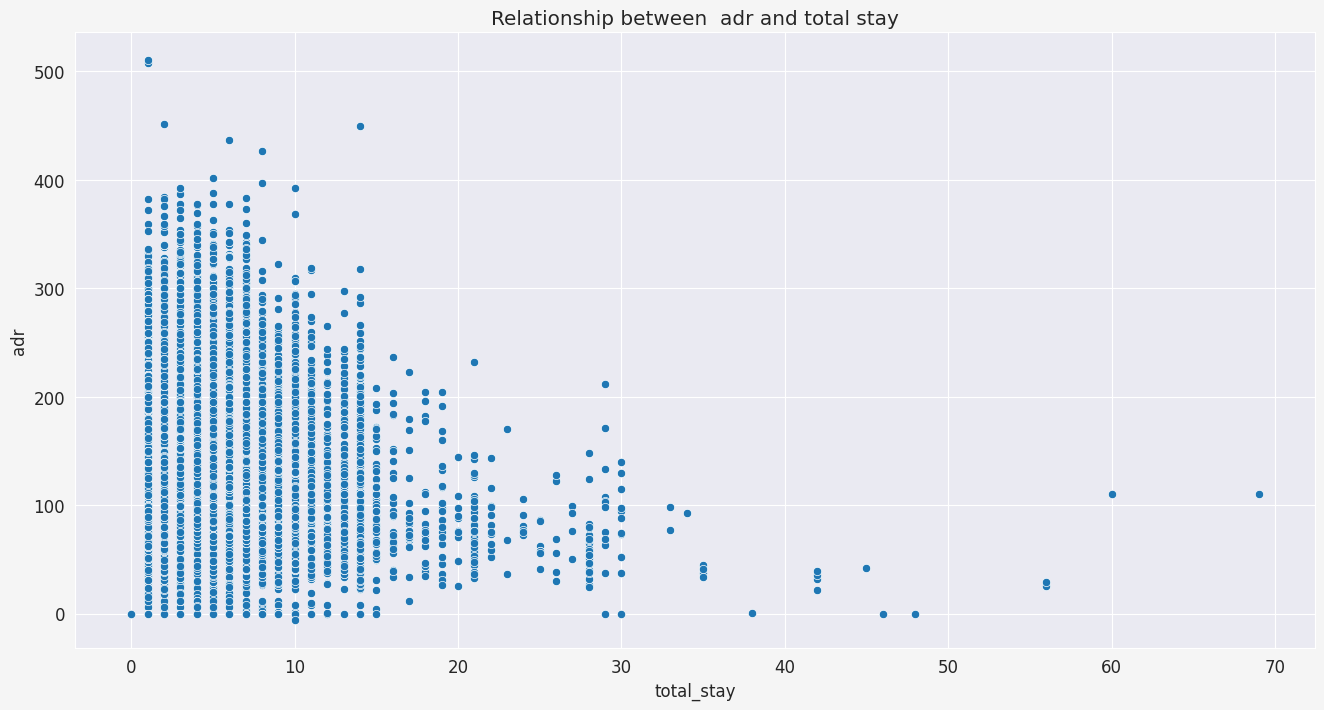

In [43]:
# Chart - 13 visualization code
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)
plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'])
plt.title('Relationship between  adr and total stay')
#From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

Text(0.5, 1.0, 'ADR v/s Total Number of people')

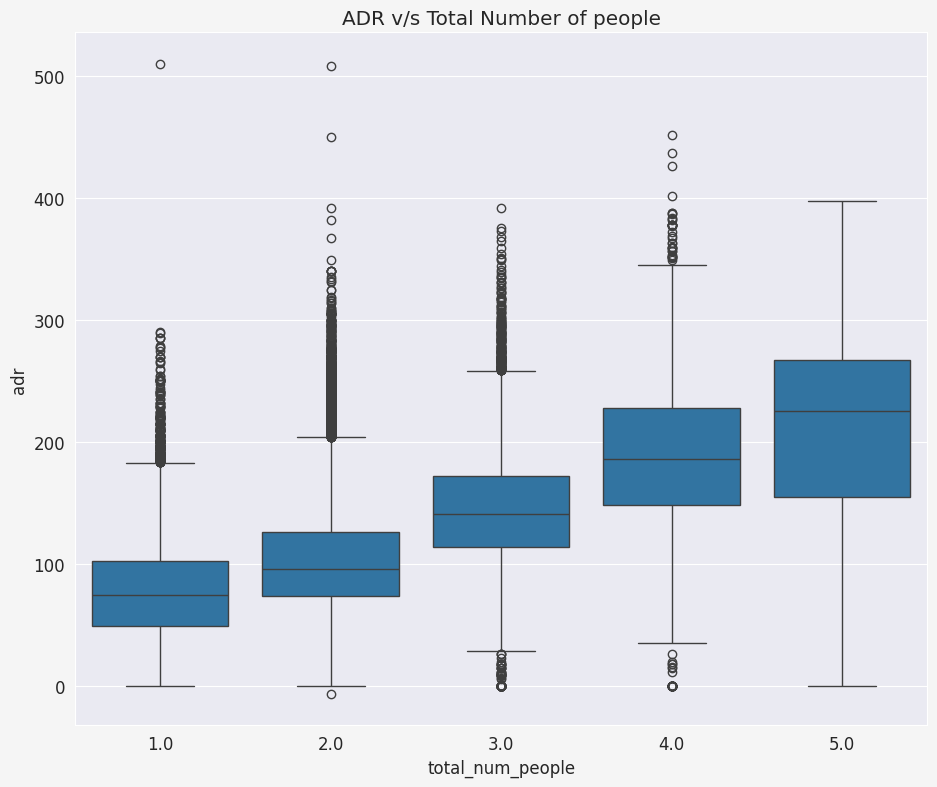

In [44]:
# Chart - 13.0 visualization code
plt.figure(figsize=(11,9))
df2=df1[df1['total_num_people'] < 6]

sns.boxplot(x=df2['total_num_people'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')
#As the total number of people increases adr also increases.
#Thus adr and total people are directly proportional to each other.

##### 1. Why did you pick the specific chart?

**This chart actually helps us in understanding ADR relationship with total number of people and with total_stay**

##### 2. What is/are the insight(s) found from the chart?

##### **As the total number of people increases adr also increases.**
##### **Thus adr and total people are directly proportional to each other.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

#####**The hotel and resort business are doing good.Neither the revenue of bookings had negative trends.In order to have maximum success for the hotel group the resort business will need to find more ways to attract guests.They will also need to put more empasis towards other than BB -Meal as that is the maximum sold type meal for both hotel.The max guests are coming from Portugal,They have a sizeable portion of guests coming from other countries.the business has to make more spending in advertisement towards other countries so that this portion keeps increasing.**
**As per the data parking spaces were not required by most of the guests.Hence they can look at other facilities to be given to guests instead of parking spaces.The hotel and resort both have cancellations, In order to decrease the rate of cancellation they have to find innovative ways.**
**The data given shows that the longer the customer stays in the hotel/resort the greater is the revenue made by the Hotel**.
####**For overall business growth and to increase the rate of ADR we should find ways to retain customers for longer days.**   

# **Conclusion**



1. **We found that 61.07% preferred city hotel and 38.93% preferred to book a resort hotel**
2. **The city hotel has made more number of bookings in years 2016 and 2017.The resort did have more bookings in 2016 but there was a noticeable decline in 2017.**
3.  **The city hotels have more ADR that means City hotels Generate more Revenue than Resort Hotels**
4. **91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.**
5. **City hotel bookings had a higher waiting time.**
6.  **Here, we found that overall more than 27% of booking got cancelled**
7.   **The month of July and August had the most Bookings. Summer vaccation can be the reason for the bookings.**
8.  **The maximum bookings is done through Online TA and Offline TA/TO.**
9.   **Room type A and D have been booked maximum in the last 3years.**
10.   **We have a very small percentage of clients repeating the hotel and though we have a large clientile**
11.   **From above insight we have found that the avrage stay length is 7 days for both types**
12.  **Bed and Breakfast(BB)is the most preferred type of booking for Guest.**
13. **As the total number of people increases adr also increases.Thus adr and total people are directly proportional to each other.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***